## Week 7 Live Demo
Follow along in class to get plotting practice!

# NOAA's Extended Reconstructed Sea Surface Temperature (ERSST) 

Today we will plot monthly sea surface temperature anomaly (SSTA) maps from July 1945 and July 2024. SSTA measures the temperature anomalies with respect to average climatology from 1971— 2000. 

![ERSST Map](https://podaac.jpl.nasa.gov/sites/default/files/image/images/sst%20in%20ersst.v4.187112.jpg)

These temperature data are stored in two netCDF files in this folder.

# Loading the data
1. First, access the [dataset](https://www.ncei.noaa.gov/products/extended-reconstructed-sst) and locate the files we need.
2. Run starter code to grab URLs without downloading
- If the starter code cell below is taking way too long to run, go ahead and download the files you need from the dataset link and load them into your JupyterHub to access them! 
3. Display DataSets.

In [10]:
## Starter code: run this to get your data from the NCEI database
# import packages and necessary classes
import requests
from netCDF4 import Dataset
import xarray as xr

# helper function to grab data from NCEI and convert to xarray
def get_data(url):
    link = Dataset(url)
    return(xr.open_dataset(xr.backends.NetCDF4DataStore(link)))

# grab dataset from July 1945 and 2024
sst_1945=get_data('https://www.ncei.noaa.gov/pub/data/cmb/ersst/v5/netcdf/ersst.v5.194507.nc#mode=bytes')
sst_2024=get_data('https://www.ncei.noaa.gov/pub/data/cmb/ersst/v5/netcdf/ersst.v5.202407.nc#mode=bytes')
sst_2023=get_data('https://www.ncei.noaa.gov/pub/data/cmb/ersst/v5/netcdf/ersst.v5.202307.nc#mode=bytes')

In [14]:
# display files
display(sst_1945)
display(sst_2024)

## examples on how not to hardcode
# filepath = '..my file blahlh'
# # not hardcoding
# xr.open_dataset(filepath)

# # hardcoding 
# xr.open_dataset('..my file blahlh')

<xarray.Dataset>
Dimensions:  (lat: 89, lev: 1, lon: 180, time: 1)
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lev      (lev) float64 0.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) object 1945-07-01 00:00:00
Data variables:
    sst      (time, lev, lat, lon) float32 ...
    ssta     (time, lev, lat, lon) float32 ...
Attributes: (12/38)
    Conventions:                CF-1.6, ACDD-1.3
    metadata_link:              https://doi.org/10.7289/V5T72FNM
    id:                         ersst.v5.194507
    naming_authority:           gov.noaa.ncei
    title:                      NOAA ERSSTv5 (in situ only)
    summary:                    ERSST.v5 is developped based on v4 after revi...
    ...                         ...
    platform:                   Ship and Buoy SSTs from ICOADS R3.0 and NCEP GTS
    instrument:                 Conventional thermometers
    source:                     In situ data: ICOADS R3.0 before 2015, NCEP i...
    comment:                    SSTs were observed by conventional thermomete...
    references:                 Huang et al, 2017: Extended Reconstructed Sea...
    climatology:                Climatology is based on 1971-2000 SST, Xue, Y...

<xarray.Dataset>
Dimensions:  (lat: 89, lev: 1, lon: 180, time: 1)
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lev      (lev) float64 0.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2024-07-15
Data variables:
    sst      (time, lev, lat, lon) float32 ...
    ssta     (time, lev, lat, lon) float32 ...
Attributes: (12/70)
    Conventions:                     CF-1.6, ACDD-1.3
    metadata_link:                   https://doi.org/10.7289/V5T72FNM
    dataset_doi:                     https://doi.org/10.7289/V5T72FNM
    id:                              gov.noaa.ncdc:C00927
    naming_authority:                gov.noaa.ncei
    title:                           NOAA ERSSTv5 (in situ only)
    ...                              ...
    references:                      Huang et al, 2017: Extended Reconstructe...
    climatology:                     Climatology is based on 1971-2000 SST, X...
    acknowledgment:                  The NOAA Extended Reconstructed Sea Surf...
    history:                         Sun Nov  3 13:15:27 2024: ncap2 -O -s ti...
    NCO:                             netCDF Operators version 4.7.5 (Homepage...
    nco_openmp_thread_number:        1

## For each DataSet:
1. What are the dimensions of the DataSet? 

2. Get the longitude and latitude values from the DataSet. 

3. Index the SSTA variables to get a 2-D arrays for plotting.

In [17]:
# these are my dimensions
dimensions=sst_1945.dims
# grab lon and lat values
# sst_1945['lon'].values
lon=sst_1945.lon.values
lat=sst_1945.lat.values

# create 2D ssta datasets
ssta_1945=sst_1945['ssta'].isel(lev=0, time=0)
ssta_2024=sst_2024['ssta'].isel(lev=0, time=0)
# this does the exact same thing, only by slicing!
sst_1945['ssta'][0,0,:,:]

<xarray.DataArray 'ssta' (lat: 89, lon: 180)>
[16020 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
    lev      float64 0.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    time     object 1945-07-01 00:00:00
Attributes:
    long_name:  Extended reconstructed SST anomalies
    units:      degree_C
    valid_min:  -12.0
    valid_max:  12.0

## Let's make basic global maps of SSTA.

1) Set PlateCarree projection.

2) Add coastlines.

3) Plot SST using pcolormesh.

4) Add a colorbar.

Text(0.5, 1.0, '2024 SSTA')

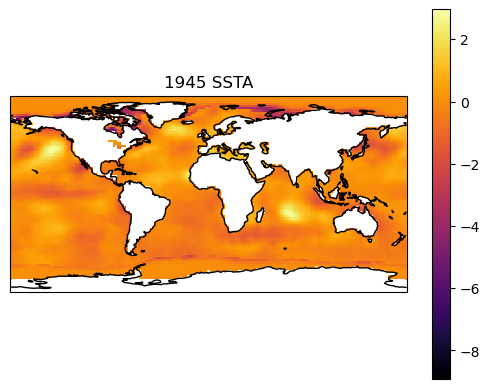

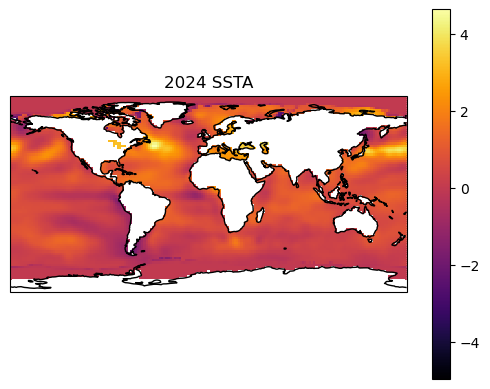

In [18]:
# import packages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs 
import cartopy.feature as cfeature

# create a figure object with matplotlib
fig = plt.figure()
# set projection
ax = plt.axes(projection = ccrs.PlateCarree())
# add coastlines
ax.coastlines(resolution = '110m', color='black')
# make heat map/color map
plt.pcolormesh(lon, lat, ssta_1945, cmap='inferno', 
               transform=ccrs.PlateCarree())
# add a colorbar
plt.colorbar()
# add a title
plt.title('1945 SSTA')

# create a figure object with matplotlib
fig = plt.figure()
# set projection
ax = plt.axes(projection = ccrs.PlateCarree())
# add coastlines
ax.coastlines(resolution = '110m', color='black')
# make heat map/color map
plt.pcolormesh(lon, lat, ssta_2024, cmap='inferno', 
               transform=ccrs.PlateCarree())
# add a colorbar
plt.colorbar()
# add a title
plt.title('2024 SSTA')

## Discussion: How can we make these maps better?

- Colorbars between both maps are different. Making the same might be easier read adn compare across time. 
- add axes labels (specify longitude nad latitude)
- No label on colorbar or units
- Make maps bigger, better aspect ratio with colorbar 
    - Referenced this stackoverflow [post](https://stackoverflow.com/questions/72953739/colorbar-placement-in-cartopy) for help
- Projection looks smushed

## Let's make *better* global maps of SSTA.
1) Set a better global projection.

2) Add land features.

3) Plot SST using pcolormesh. Set the same colormap limits for each map (named arguments *vmin* and *vmax*). Use a different colormap.

4) Bonus: Add latitude and longitude gridlines.

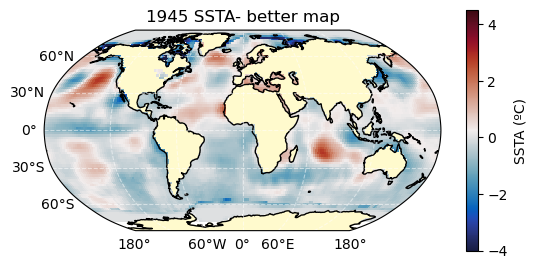

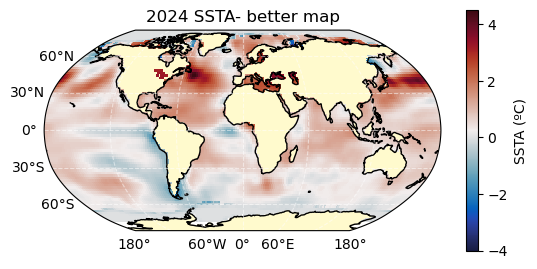

In [40]:
import cmocean
# import matplotlib function to adjust sizing with figure
from mpl_toolkits.axes_grid1 import make_axes_locatable


## Figure for 1945 SSTA
# create a blank figure
fig = plt.figure()
# set a robinson projection
ax=plt.axes(projection = ccrs.Robinson())
# plot ssta, choose NON-SEQUENTIAL cmap to highlight difference between SSTA differences that are warmer or colder
p=plt.pcolormesh(lon, lat, ssta_1945, cmap=cmocean.cm.balance,
               transform=ccrs.PlateCarree(),
               vmin=-4, vmax=4.5)

# add land feature and color
ax.add_feature(cfeature.LAND, color='lemonchiffon')
# add coastlines feature
ax.coastlines(resolution='110m', color='black')
# add a colorbar and set label, and shrink to fit size of map
cb = fig.colorbar(p, label=r"SSTA (ºC)", shrink=0.65, pad=0.05)
plt.title('1945 SSTA- better map')
# add gridlines and labels
g1 = ax.gridlines(crs=ccrs.PlateCarree(), color='white', linestyle='--',
            alpha=0.5)
# add longitude labels on bottom
g1.bottom_labels = True
# add latitude labels to left 
g1.left_labels = True


## Figure for 2024 SSTA
# create a blank figure
fig = plt.figure()
# set a robinson projection
ax=plt.axes(projection = ccrs.Robinson())
# plot ssta, choose NON-SEQUENTIAL cmap to highlight difference between SSTA differences that are warmer or colder
p=plt.pcolormesh(lon, lat, ssta_2024, cmap=cmocean.cm.balance,
               transform=ccrs.PlateCarree(),
               vmin=-4, vmax=4.5, label='SSTA')

# add land feature and color
ax.add_feature(cfeature.LAND, color='lemonchiffon')
# add coastlines feature
ax.coastlines(resolution='110m', color='black')

# add a colorbar and set label, and shrink to fit size of map
cb = fig.colorbar(p, label=r"SSTA (ºC)", shrink=0.65, pad=0.05)

plt.title('2024 SSTA- better map')
# add gridlines 
g2=ax.gridlines(crs=ccrs.PlateCarree(), color='white', linestyle='--',
            alpha=0.5)
# add lon
g2.bottom_labels=True
# add lat
g2.left_labels=True

## Let's focus on a specific place 

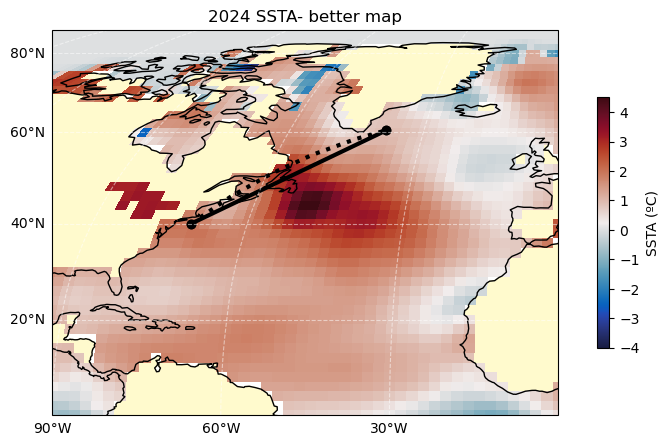

In [37]:
## Figure for 2024 SSTA
# create a blank figure
fig = plt.figure(figsize=(10,5))
# set a robinson projection
ax=plt.axes(projection = ccrs.Robinson())
ax.set_extent([-90, 0, 0, 90])
ax.set_aspect(0.75)
# plot ssta, choose NON-SEQUENTIAL cmap to highlight difference between SSTA differences that are warmer or colder
p=plt.pcolormesh(lon, lat, ssta_2024, cmap=cmocean.cm.balance,
               transform=ccrs.PlateCarree(),
               vmin=-4, vmax=4.5, label='SSTA')

# add land feature and color
ax.add_feature(cfeature.LAND, color='lemonchiffon')
# add coastlines feature
ax.coastlines(resolution='110m', color='black')

# add a colorbar and set label, and shrink to fit size of map
cb = fig.colorbar(p, label=r"SSTA (ºC)", shrink=0.65, pad=0.05)

plt.title('2024 SSTA- better map')
# add gridlines 
g2=ax.gridlines(crs=ccrs.PlateCarree(), color='white', linestyle='--',
            alpha=0.5)
# add lon
g2.bottom_labels=True
# add lat
g2.left_labels=True

# irminger station
ilat, ilon = (60.4582, -38.4407)
# coastal pioneer station
plat, plon = (40.1000, -70.8800)

# plot trajectory using different crs
ax.plot([plon, ilon], [plat, ilat], 
        'ko-', lw=3, transform=ccrs.PlateCarree())
ax.plot([plon, ilon], [plat, ilat],
        'ko:', lw=3, transform=ccrs.Geodetic());


<a list of 138 text.Text objects>

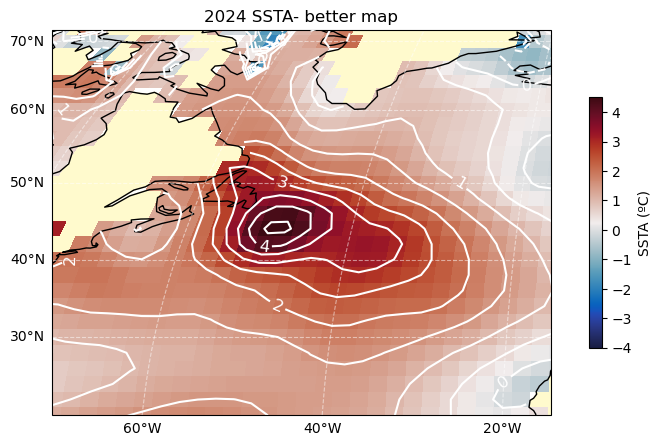

In [54]:
# focus on specific hot region and draw some contours
fig = plt.figure(figsize=(10,5))
# set a robinson projection
ax=plt.axes(projection = ccrs.Robinson())
ax.set_extent([-70, -20, 20, 70])
ax.set_aspect(0.75)
# plot ssta, choose NON-SEQUENTIAL cmap to highlight difference between SSTA differences that are warmer or colder
p=plt.pcolormesh(lon, lat, ssta_2024, cmap=cmocean.cm.balance,
               transform=ccrs.PlateCarree(),
               vmin=-4, vmax=4.5, label='SSTA')

# add land feature and color
ax.add_feature(cfeature.LAND, color='lemonchiffon')
# add coastlines feature
ax.coastlines(resolution='110m', color='black')

# add a colorbar and set label, and shrink to fit size of map
cb = fig.colorbar(p, label=r"SSTA (ºC)", shrink=0.65, pad=0.05)

plt.title('2024 SSTA- better map')
# add gridlines 
g2=ax.gridlines(crs=ccrs.PlateCarree(), color='white', linestyle='--',
            alpha=0.5)
# add lon
g2.bottom_labels=True
# add lat
g2.left_labels=True

# contours
cntr = ax.contour(lon,lat,ssta_2024,levels=20,transform=ccrs.PlateCarree(),colors='w')
ax.clabel(cntr,levels=cntr.levels[::2],colors='w',fontsize=12)